In [127]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
data_path = '/Users/ameliabaum/Desktop/Amelia/Berkeley Fall 2019/CY PLAN 257/Final Project/data/'


In [71]:
zcode_data = pd.read_csv(data_path+"zip_code_features.csv")
zcode_data.head()
zcode_data.columns

Index(['ZIP', 'num_sw', 'num_ndnw', 'num_pickdrop', 'num_discret', 'num_shop',
       'num_home', 'num_em', 'num_m', 'num_aft', 'num_evn', 'num_walk',
       'num_bike', 'num_auto', 'num_transit', 'num_other'],
      dtype='object')

In [72]:
# standard_data
features = zcode_data.columns[1:]
features

Index(['num_sw', 'num_ndnw', 'num_pickdrop', 'num_discret', 'num_shop',
       'num_home', 'num_em', 'num_m', 'num_aft', 'num_evn', 'num_walk',
       'num_bike', 'num_auto', 'num_transit', 'num_other'],
      dtype='object')

In [73]:
from sklearn.preprocessing import StandardScaler
features = zcode_data.columns[1:]
# Separating out the features
x = zcode_data.loc[:, features].values
# Separating out the target
# y = zcode_data.loc[:,['ZIP']].values
# Standardizing the features
standard_data = StandardScaler().fit_transform(x)

/Users/ameliabaum/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/ameliabaum/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [112]:
pca_model = PCA(n_components=4)
principalComponents = pca_model.fit_transform(standard_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3',
                         'principal component 4'])

In [125]:
principalDf.head()
standard_data

array([[-0.45146976, -0.2282974 , -0.59349441, ..., -0.19194926,
        -0.2226495 , -0.08128355],
       [-0.51653513, -0.41394708, -0.23427196, ..., -0.59231498,
        -0.2226495 , -0.08128355],
       [-0.25627366, -0.59959675, -0.14446635, ..., -0.2902847 ,
        -0.2226495 , -0.08128355],
       ...,
       [-0.71173123, -0.59959675, -0.68330002, ..., -0.73279417,
        -0.2226495 , -0.08128355],
       [-0.61413318, -0.59959675, -0.68330002, ..., -0.69767437,
        -0.2226495 , -0.08128355],
       [ 1.46795858,  0.32865162,  0.39436732, ...,  1.26201043,
         3.79172405, -0.08128355]])

In [114]:
finalDf = pd.concat([principalDf, zcode_data[['ZIP']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,ZIP
0,-0.423623,-0.083533,0.397452,0.197063,90001
1,-1.745629,0.083720,0.201421,0.096383,90002
2,-0.834414,-0.046175,0.043871,0.066960,90003
3,-0.506615,0.124565,0.854259,0.318724,90004
4,-1.221657,0.184625,0.725162,0.210071,90005


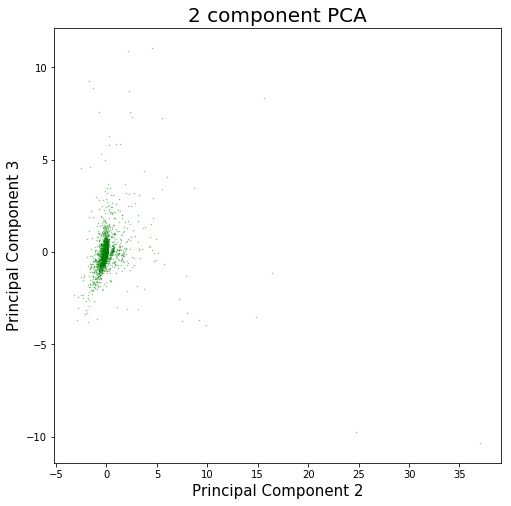

In [115]:
plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 

# targets = finalDf["ZIP"][0:2]
# colors = ['r', 'g', 'b']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['ZIP'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#                , finalDf.loc[indicesToKeep, 'principal component 2']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()
ax = plt.scatter(finalDf.iloc[:,1], finalDf.iloc[:,2], color='g', alpha=.5, edgecolor='g', s=0.2)
plt.xlabel('Principal Component 2', fontsize = 15)
plt.ylabel('Principal Component 3', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)
plt.show()

In [116]:
explained = pca_model.explained_variance_ratio_
explained_sum = np.cumsum(explained)
# eigenvector = np.array(range(1,24))

print(explained_sum)
# print(len(eigenvector))

[0.69247122 0.7860315  0.83902699 0.87668953]


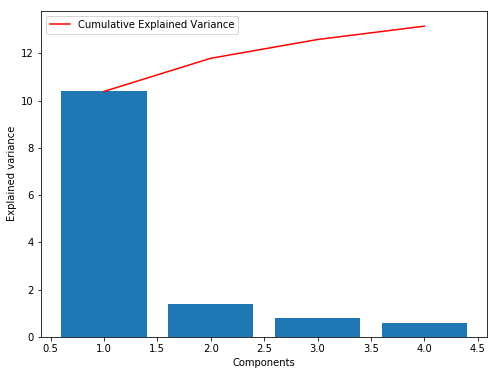

In [117]:
plt.figure(figsize=(8,6))
plt.bar(range(1,len(pca_model.explained_variance_ )+1),pca_model.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca_model.explained_variance_ )+1),
         np.cumsum(pca_model.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

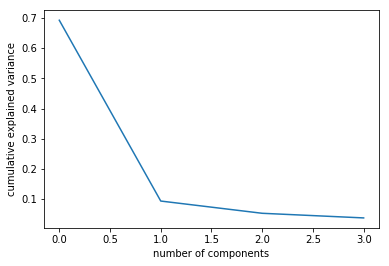

In [118]:
plt.plot(pca_model.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [101]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,-0.423623,-0.083533,0.397452,0.197063
1,-1.745629,0.083720,0.201421,0.096383
2,-0.834414,-0.046175,0.043871,0.066960
3,-0.506615,0.124565,0.854259,0.318724
4,-1.221657,0.184625,0.725162,0.210071


In [107]:
import plotly.express as px
fig = px.scatter_3d(principalDf, x='principal component 1', y='principal component 2', z='principal component 3',
                   opacity=0.7)
fig.show()

In [123]:
pca_model.components_

array([[ 0.28373778,  0.26588663,  0.27216057,  0.29009721,  0.26889711,
         0.27061518,  0.27767242,  0.30583002,  0.30582345,  0.30018113,
         0.210336  ,  0.20924901,  0.30122216,  0.09852404,  0.04787862],
       [ 0.05907502, -0.12798884,  0.06337881, -0.04643762, -0.12912901,
        -0.12277595,  0.01581066, -0.01861402, -0.04793027, -0.02530791,
         0.18709465, -0.00998238, -0.09526601,  0.64060638,  0.69578515],
       [ 0.12296841, -0.12971033, -0.21479936,  0.01070215, -0.14392379,
        -0.18286579, -0.15099631,  0.01802214, -0.01611636,  0.01050636,
         0.60623841,  0.59188199, -0.20012228,  0.04224767, -0.29063524],
       [-0.0060724 , -0.02447723,  0.04367647, -0.01140412, -0.03603331,
        -0.05980149,  0.03295597,  0.00366747, -0.00481749,  0.00643401,
         0.12758187,  0.20556819, -0.03882785, -0.74069158,  0.61856326]])

In [154]:
standard_data
std_data = pd.DataFrame(standard_data, columns=zcode_data.columns[1:])
std_data.head()

,num_sw,num_ndnw,num_pickdrop,num_discret,num_shop,num_home,num_em,num_m,num_aft,num_evn,num_walk,num_bike,num_auto,num_transit,num_other
0,-0.451470,-0.228297,-0.593494,-0.217862,-0.469301,0.195842,0.474106,0.105528,-0.274079,-0.103312,0.350719,0.114176,-0.191949,-0.22265,-0.081284
1,-0.516535,-0.413947,-0.234272,-0.647192,-0.571818,-0.613262,-0.624174,-0.393461,-0.525925,-0.569825,-0.008155,-0.412324,-0.592315,-0.22265,-0.081284
2,-0.256274,-0.599597,-0.144466,-0.389594,-0.059233,-0.098377,-0.324643,-0.184208,-0.211118,-0.067427,0.111470,-0.412324,-0.290285,-0.22265,-0.081284
3,-0.451470,-0.228297,-0.144466,-0.303728,-0.315525,-0.319042,0.074732,-0.280786,-0.226858,0.129944,0.978750,0.114176,-0.423740,-0.22265,-0.081284
4,-0.353872,-0.599597,-0.503689,-0.561326,-0.469301,-0.466152,-0.224799,-0.296883,-0.352781,-0.193026,0.739500,-0.280699,-0.536123,-0.22265,-0.081284


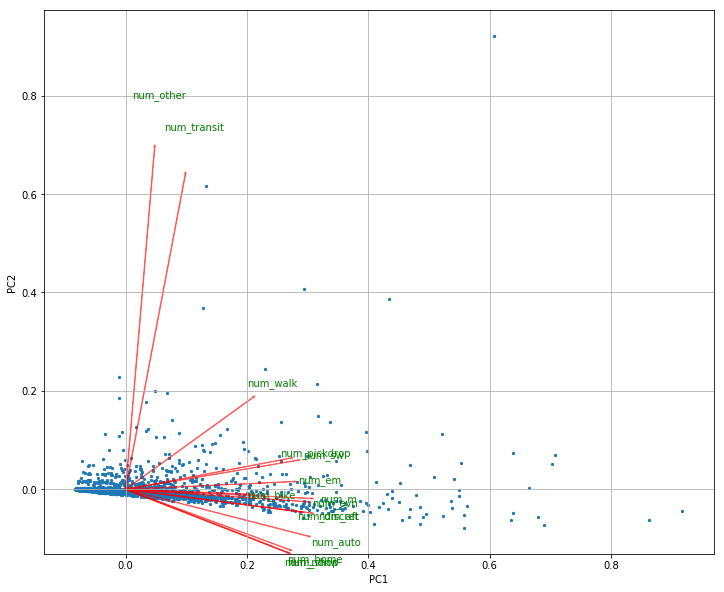

In [157]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.figure(figsize=(12,10))
myplot(principalComponents[:,0:2],np.transpose(pca_model.components_[0:2, :]),list(std_data.columns))
plt.show()

In [142]:
# zcode_data

4

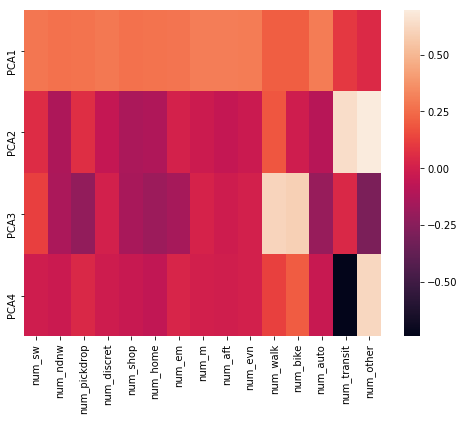

In [146]:
plt.figure(figsize = (8,6))
sns.heatmap(pca_model.components_,
      yticklabels=[ "PCA"+str(x) for x in range(1,pca_model.n_components_+1)],
        xticklabels=list(features) )
pca_model.n_components